<center>

> ## 📚 Student Profile
> **Name:** Mohammad Sadegh Kalami Yazdi  
> **ID:** `402811068`

</center>

 <h1><center><font size="6">CNN with Tensorflow|Keras for Fashion MNIST</font></center></h1>


<center><img src="https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png" width="600"></img></center>


# <a id='0'>Content</a>  
- <a href='#1'>Load packages</a>  
- <a href='#2'>Read the data</a>  
- <a href='#3'>Data exploration</a>
    - <a href='#31'>Class distribution</a>
    - <a href='#32'>Images samples</a>
- <a href='#4'>Model</a>  
    - <a href='#41'>Prepare the model</a>  
    - <a href='#42'>Define the mode</a>  
    - <a href='#43'>Training model</a>   
    - <a href='#44'>Test prediction accuracy</a>    
- <a href='#5'>Visualize the classified images</a>  
    - <a href='#51'>Correctly classified images</a>   
    - <a href='#52'>Incorrectly classified images</a>

# <a id="1">Load packages</a>

In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

2024-04-30 18:23:44.955380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 18:23:44.955557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 18:23:45.090675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# <a id="2">Read the data</a>

There are 10 different classes of images, as following:

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate datasets.

# <a id="3">Data exploration</a>

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Fashion MNIST train",x_train.shape[0])
print("Fashion MNIST test",x_test.shape[0])

Fashion MNIST train 60000
Fashion MNIST test 10000


## <a id="31">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

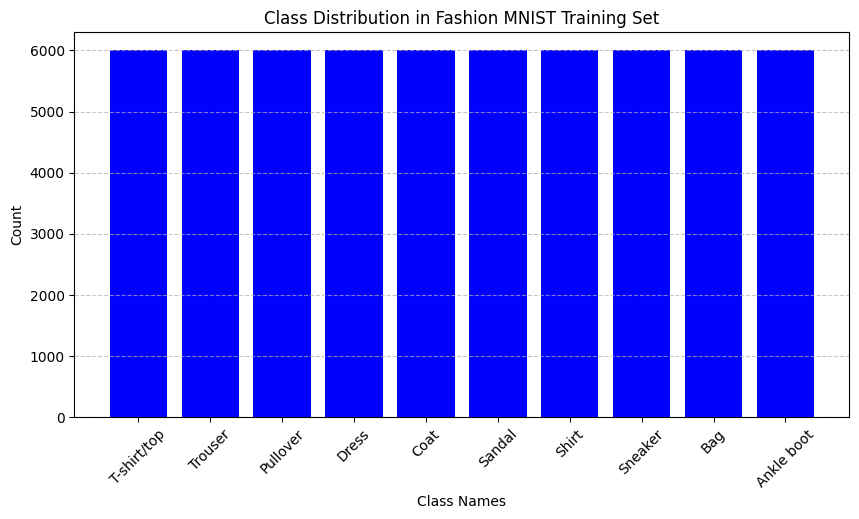

In [4]:

class_counts = np.bincount(y_train.flatten())

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='blue')
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Class Distribution in Fashion MNIST Training Set')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

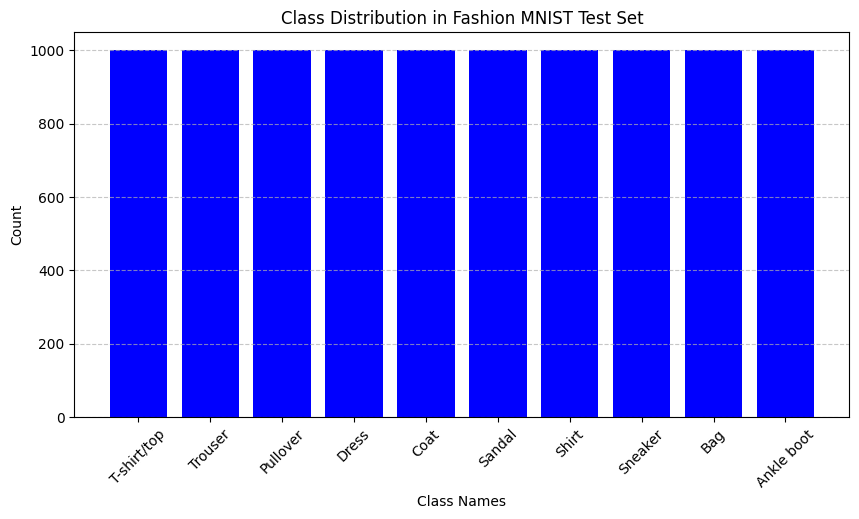

In [5]:
class_counts = np.bincount(y_test.flatten())

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='blue')
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Class Distribution in Fashion MNIST Test Set')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <a id="32">Sample images</a>

### Train set images

plotting some samples for the images.

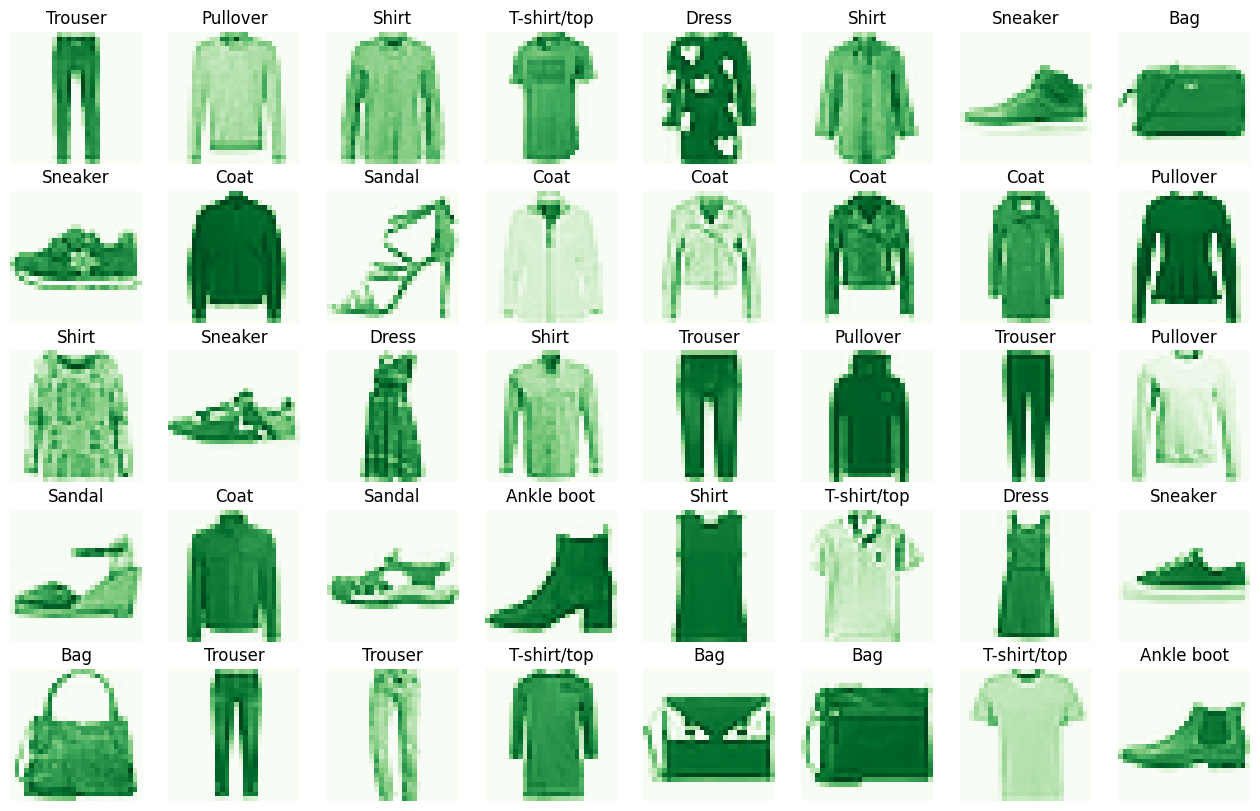

In [6]:

indices = np.random.choice(np.arange(len(x_train)), size=40, replace=False)
train_sample_images = x_train[indices]
train_sample_labels = y_train[indices]
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_sample_images(data_sample_images, data_sample_labels, cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5, 8, figsize=(16, 10))  # Adjusted for 40 images

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

# Call the function with a sample of images and labels
plot_sample_images(train_sample_images, train_sample_labels, "Greens")

### Test set images
plotting a selection of the test set images.  
Labels are as well added (they are known).

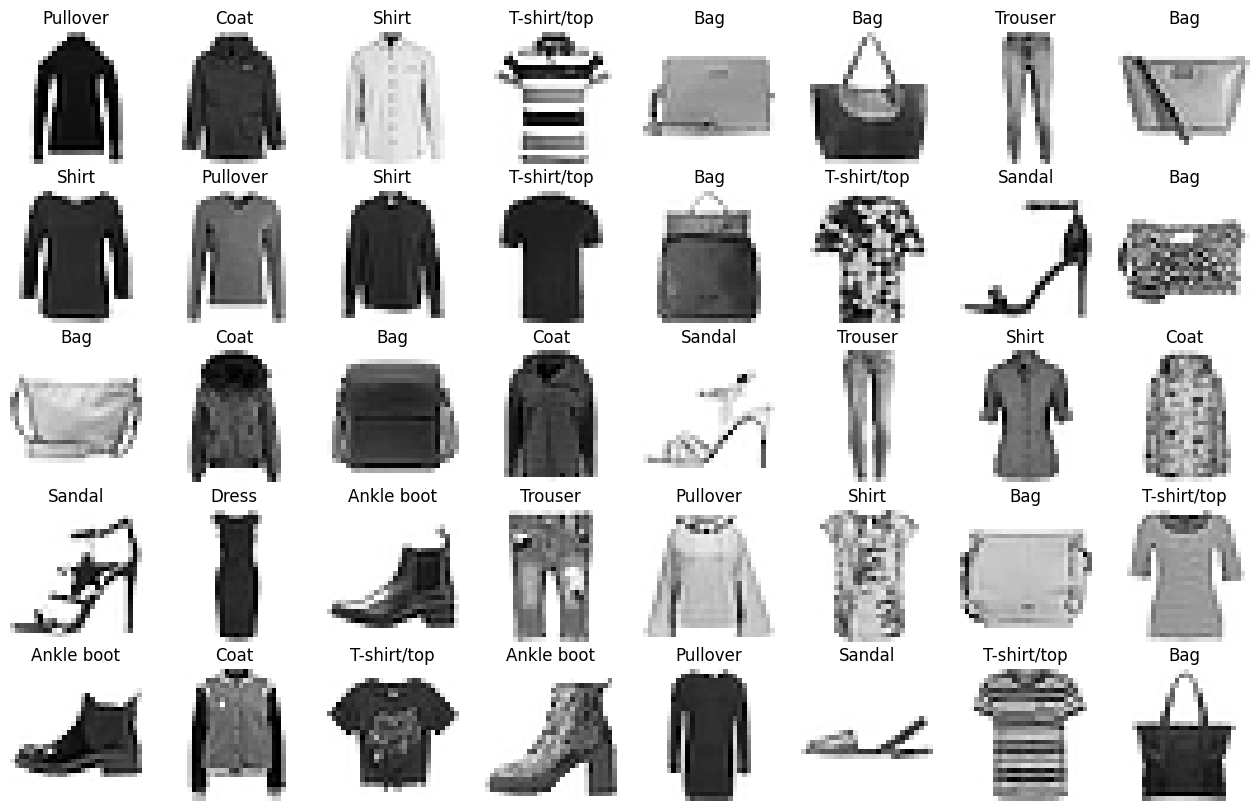

In [7]:

indices = np.random.choice(np.arange(len(x_test)), size=40, replace=False)
test_sample_images = x_test[indices]
test_sample_labels = y_test[indices]

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_sample_images(data_sample_images, data_sample_labels, cmap="Blues"):
    f, ax = plt.subplots(5, 8, figsize=(16, 10))  # Adjusted for 40 images

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(test_sample_images, test_sample_labels, "Greys")

# <a id="4">Model</a>

starting with preparing the model.

## <a id="41">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

In [8]:
# Normalize the image data to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Reshape the data to include a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display the shape of the processed data
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


## <a id="42">Define the model</a>

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,LearningRateScheduler

model = Sequential([
    Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal(), input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(512, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(1024, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(1024, (3, 3), padding='same', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(2048, kernel_initializer=HeNormal()),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.6),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


model_checkpoint = ModelCheckpoint(
    'best_model_updated.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7, 7, 512)      │             

 Total params: 20,875,146 (79.63 MB)

 Trainable params: 20,863,370 (79.59 MB)

 Non-trainable params: 11,776 (46.00 KB)

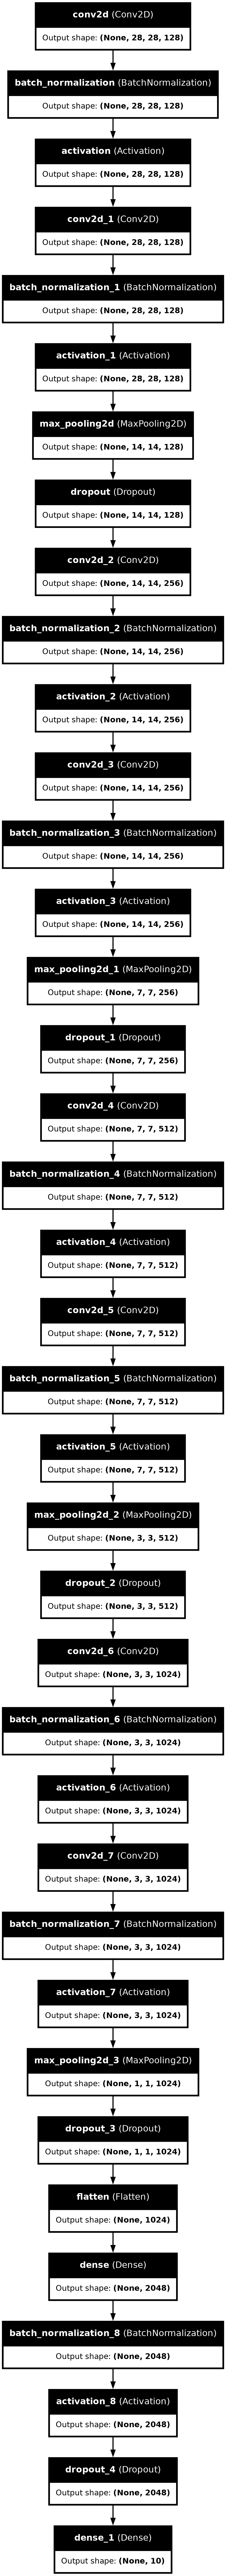

In [10]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 8,
        zoom_range = 0.1,
        shear_range = 0.3,
        width_shift_range=0.08,
        height_shift_range=0.08)
# vertical_flip=True

In [12]:
datagen.fit(x_train)

In [13]:
batch_size = 128
epochs = 120
callbacks = [early_stopping,lr_scheduler, model_checkpoint]

## <a id="43">Train the model</a>

In [14]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=2,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = callbacks)

Epoch 1/120


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

I0000 00:00:1714501481.080840      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714501481.112920      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.46781, saving model to best_model_updated.keras
468/468 - 85s - 181ms/step - accuracy: 0.7323 - loss: 0.7240 - val_accuracy: 0.8335 - val_loss: 0.4678 - learning_rate: 0.0010
Epoch 2/120


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss improved from 0.46781 to 0.46244, saving model to best_model_updated.keras
468/468 - 4s - 8ms/step - accuracy: 0.8281 - loss: 0.4501 - val_accuracy: 0.8310 - val_loss: 0.4624 - learning_rate: 9.0000e-04
Epoch 3/120

Epoch 3: val_loss improved from 0.46244 to 0.33814, saving model to best_model_updated.keras
468/468 - 28s - 61ms/step - accuracy: 0.8434 - loss: 0.4221 - val_accuracy: 0.8801 - val_loss: 0.3381 - learning_rate: 8.1000e-04
Epoch 4/120

Epoch 4: val_loss improved from 0.33814 to 0.33611, saving model to best_model_updated.keras
468/468 - 3s - 7ms/step - accuracy: 0.8359 - loss: 0.4427 - val_accuracy: 0.8828 - val_loss: 0.3361 - learning_rate: 7.2900e-04
Epoch 5/120

Epoch 5: val_loss improved from 0.33611 to 0.29139, saving model to best_model_updated.keras
468/468 - 28s - 60ms/step - accuracy: 0.8707 - loss: 0.3535 - val_accuracy: 0.8994 - val_loss: 0.2914 - learning_rate: 6.5610e-04
Epoch 6/120

Epoch 6: val_loss did not improve from 0.29139
468/468 - 2s

## <a id="44">Test prediction accuracy</a>

In [15]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9275 - loss: 0.1995
Loss: 0.1923
Accuracy: 0.9294


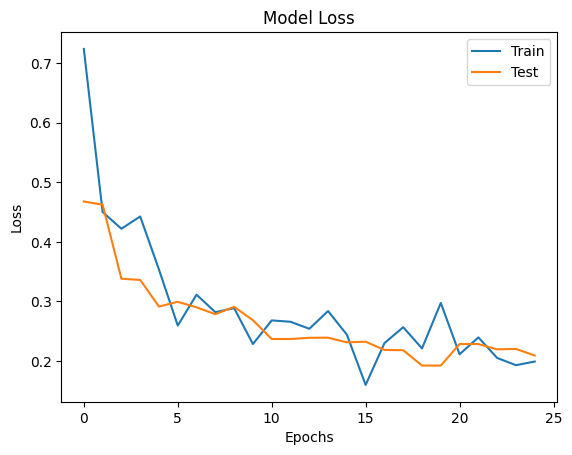

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

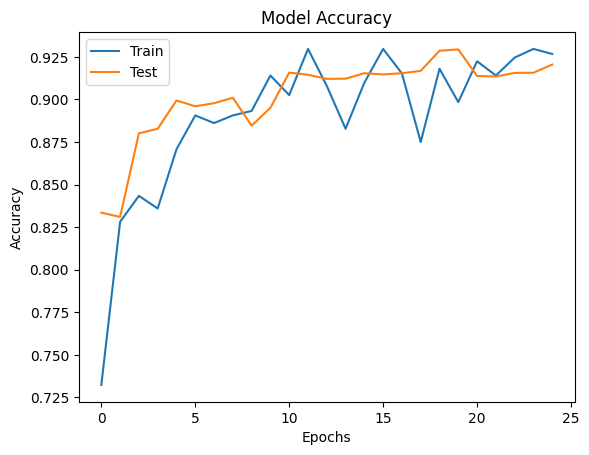

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# <a id="5">Visualize the classified images</a>

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


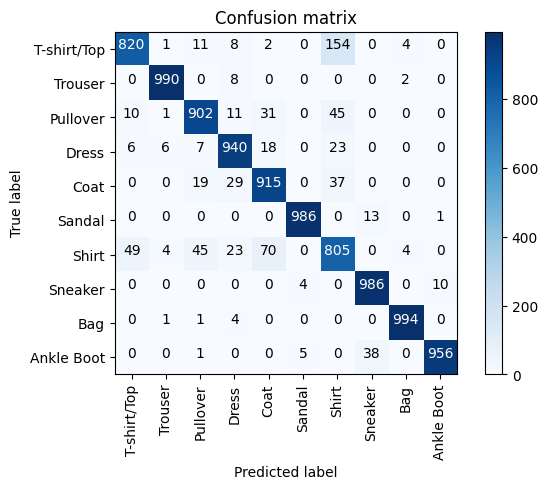

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx,
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [20]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

In [21]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

## <a id="51">Correctly classified images</a>

Text(0.5, 1.0, 'Predicted Label : Trouser\nActual Label : Trouser')

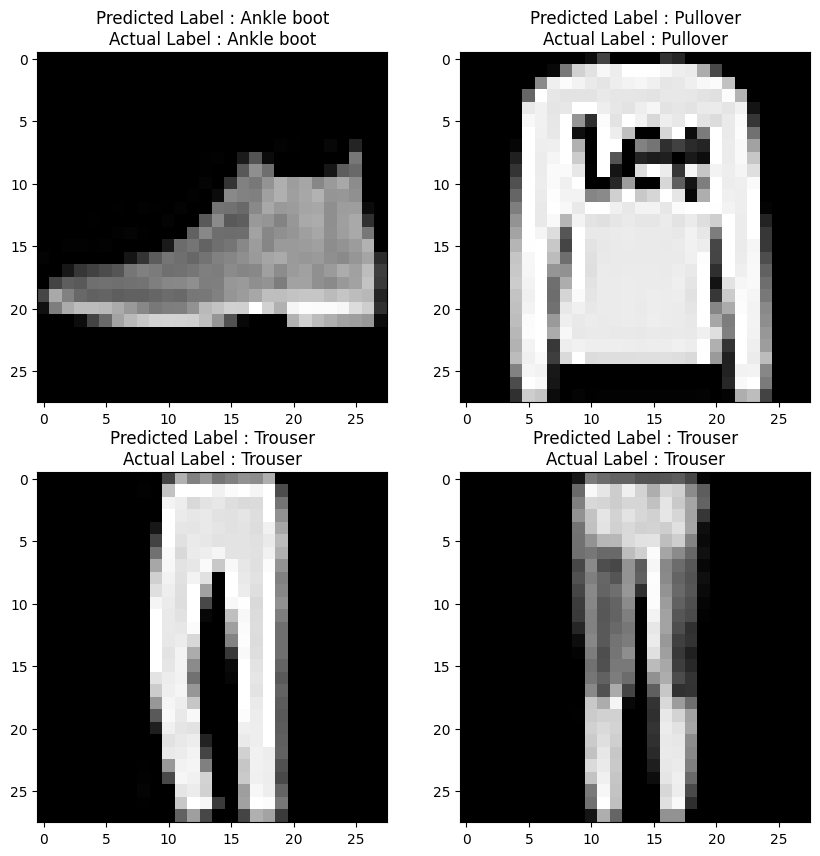

In [22]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[3]]]))

## <a id="52">Incorrectly classified images</a>

In [23]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Shirt\nActual Label : T-shirt/top')

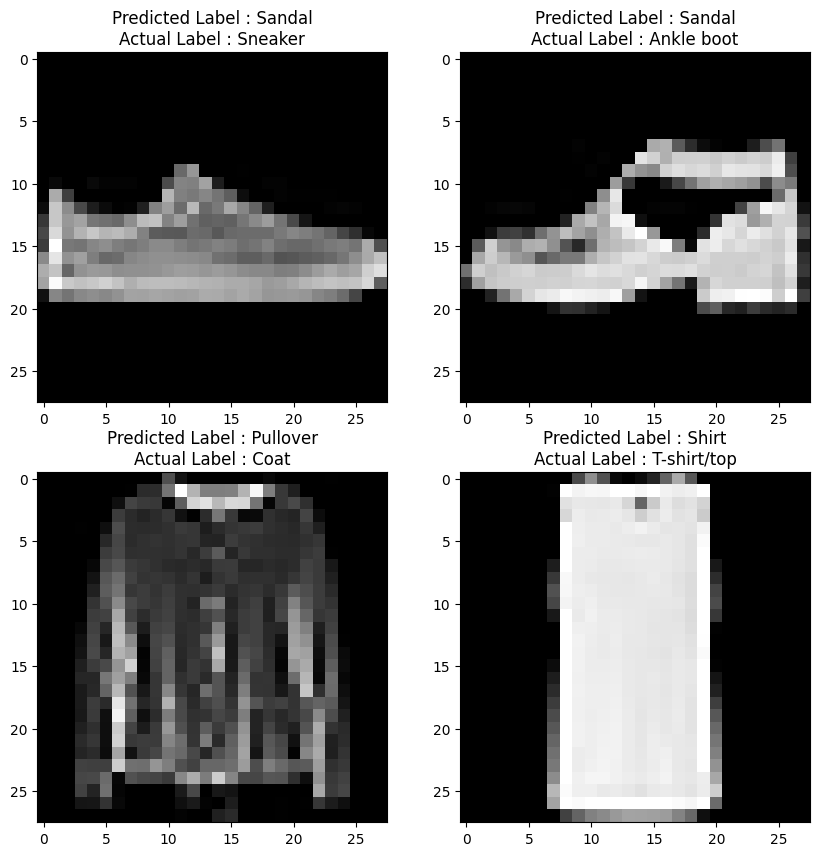

In [24]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[3]]]))

In [25]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.93      0.82      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.90      0.91      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.88      0.92      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.81      0.78      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [26]:
# from tensorflow.keras.models import load_model

# model_tmp = load_model('')

In [27]:
# from sklearn.metrics import confusion_matrix, classification_report

# Y_pred = model.predict(x_test)
# Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Y_true = np.argmax(y_test,axis = 1)
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot_confusion_matrix(confusion_mtx,
#             classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [28]:
# score = model.evaluate(x_test, y_test)

# print('Loss: {:.4f}'.format(score[0]))
# print('Accuracy: {:.4f}'.format(score[1]))